In [8]:
df<-read.csv('d:/data/game/vgsales2.csv')
df

Rank,Name,Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,...,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Label
11594,Samurai Warriors 2,Action,1,0,0,0,0,0,0,...,0,0,0,13,0.07,0.01,0.00,0.01,0.08,0
11593,P.N.03 - Product Number Three,Shooter,0,0,0,0,0,0,0,...,0,0,0,16,0.06,0.02,0.00,0.00,0.08,0
11592,Minecraft: Story Mode,Adventure,0,1,0,0,0,0,0,...,0,0,0,4,0.02,0.05,0.00,0.01,0.08,0
11591,Real Robots Final Attack,Shooter,0,0,0,0,0,0,0,...,0,0,0,21,0.00,0.00,0.07,0.01,0.08,0
11590,Pocket Dogs,Misc,0,0,0,1,0,0,0,...,0,0,0,15,0.06,0.02,0.00,0.00,0.08,0
11589,Bleach: Heat the Soul 4,Fighting,0,0,1,0,0,0,0,...,0,0,0,12,0.00,0.00,0.08,0.00,0.08,0
11588,Tokimeki Memorial 4,Adventure,0,1,0,0,0,0,0,...,0,0,0,10,0.00,0.00,0.08,0.00,0.08,0
11587,Striker 96,Sports,0,0,0,0,0,0,0,...,0,1,0,24,0.04,0.03,0.00,0.01,0.08,0
11586,Legend of the Guardians: The Owls of Ga'Hoole,Action,1,0,0,0,0,0,0,...,0,0,0,9,0.06,0.01,0.00,0.01,0.08,0
11585,Sub Rebellion,Simulation,0,0,0,0,0,0,0,...,1,0,0,17,0.04,0.03,0.00,0.01,0.08,0


In [9]:
library(dplyr)
df<-df %>% select(-Rank,-Name,-Genre,-Global_Sales)
dim(df)
head(df)

[1] 16324    18

Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role.Playing,Shooter,Simulation,Sports,Strategy,Years,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Label
1,0,0,0,0,0,0,0,0,0,0,0,13,0.07,0.01,0.00,0.01,0
0,0,0,0,0,0,0,0,1,0,0,0,16,0.06,0.02,0.00,0.00,0
0,1,0,0,0,0,0,0,0,0,0,0,4,0.02,0.05,0.00,0.01,0
0,0,0,0,0,0,0,0,1,0,0,0,21,0.00,0.00,0.07,0.01,0
0,0,0,1,0,0,0,0,0,0,0,0,15,0.06,0.02,0.00,0.00,0
0,0,1,0,0,0,0,0,0,0,0,0,12,0.00,0.00,0.08,0.00,0



    0     1 
12619  3705 

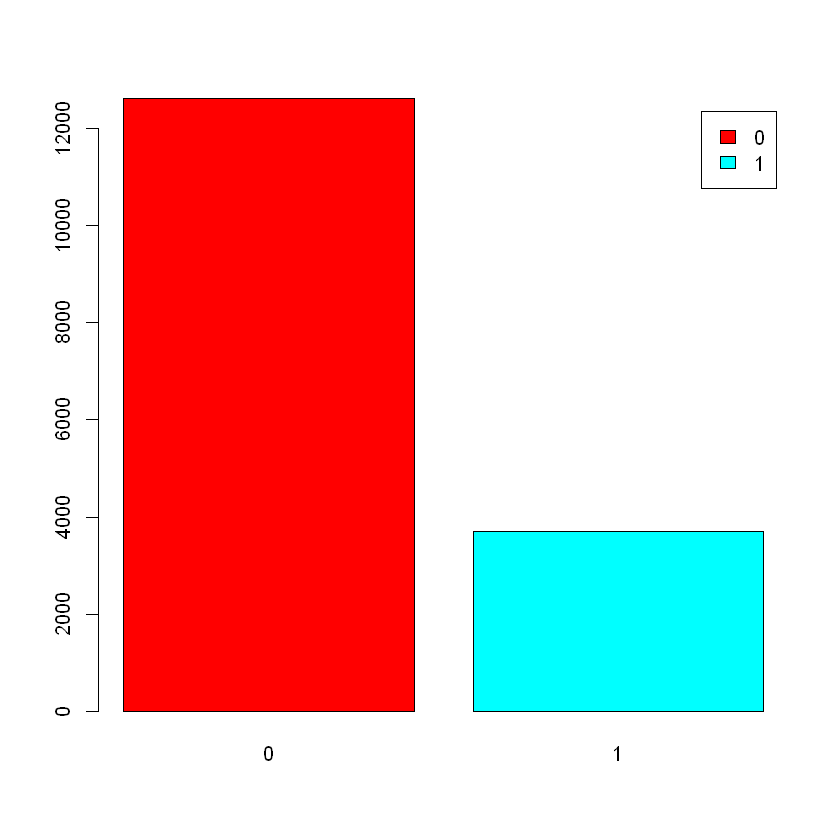

In [10]:
(tbl<-table(df$Label))
barplot(tbl,beside=T,legend=T,col=rainbow(2))
#0 평균미만, 1 평균이상 불균형데이터셋 => 언더샘플링 or 오버샘플링

In [11]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(Label ~ . , data=df, seed=1, method='under',
                    N=3705*2)$data
(tbl<-table(df_samp$Label))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




   0    1 
3705 3705 

In [13]:
library(caret)
set.seed(123)
#학습용:검증용 80:20으로 구분
idx_train<-createDataPartition(y=df_samp$Label, p=0.8, list=F)
train<-df_samp[idx_train,] #학습용
X_train<-train[,-18] #독립변수
y_train<-train[,18] #종속변수
test<-df_samp[-idx_train,]#검증용
X_test<-test[,-18]
y_test<-test[,18]

In [14]:
library(party)
model<-ctree(Label ~ . , data=train) #의사결정 나무 모형
model

Warning message:
"package 'party' was built under R version 3.6.2"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.2"


	 Conditional inference tree with 23 terminal nodes

Response:  Label 
Inputs:  Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role.Playing, Shooter, Simulation, Sports, Strategy, Years, NA_Sales, EU_Sales, JP_Sales, Other_Sales 
Number of observations:  5928 

1) NA_Sales <= 0.25; criterion = 1, statistic = 703.001
  2) JP_Sales <= 0.47; criterion = 1, statistic = 875.481
    3) EU_Sales <= 0.21; criterion = 1, statistic = 1160.974
      4) Other_Sales <= 0.03; criterion = 1, statistic = 555.193
        5) JP_Sales <= 0.23; criterion = 1, statistic = 214.075
          6)*  weights = 2471 
        5) JP_Sales > 0.23
          7) NA_Sales <= 0.07; criterion = 1, statistic = 75.795
            8)*  weights = 92 
          7) NA_Sales > 0.07
            9)*  weights = 18 
      4) Other_Sales > 0.03
        10) JP_Sales <= 0.12; criterion = 1, statistic = 119.81
          11) Other_Sales <= 0.2; criterion = 1, statistic = 103.632
            12) JP_Sales <= 0.06; criterion 

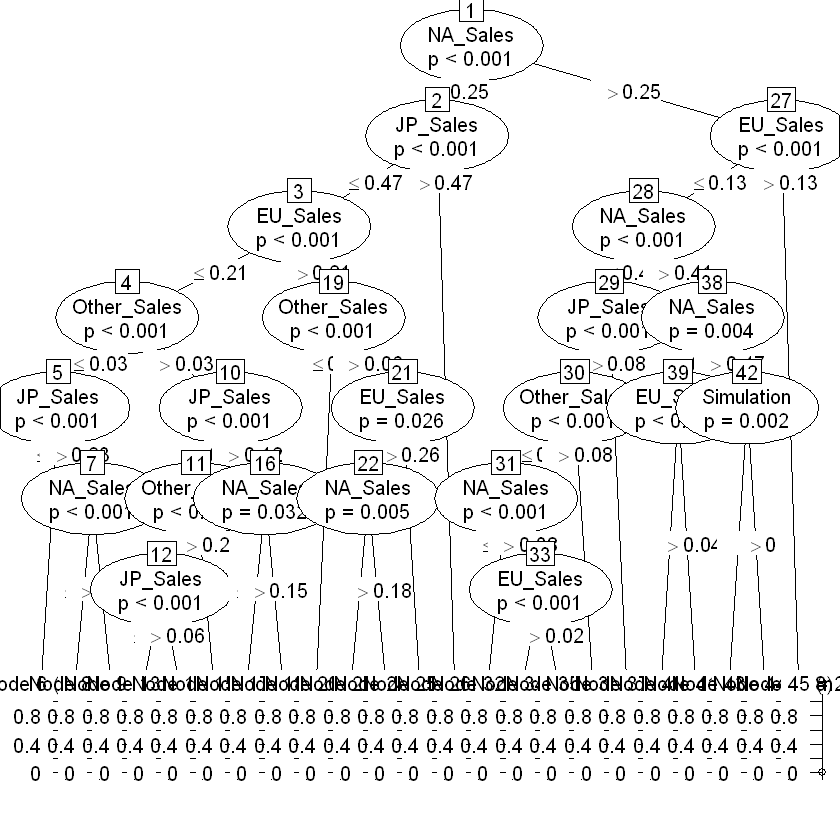

In [15]:
plot(model) #트리 그래프

In [17]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train    0    1
      0 2896   68
      1   12 2952

[1] 0.9865047

In [18]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test   0   1
     0 721  20
     1  13 728

[1] 0.9777328

In [24]:
library(randomForest)
set.seed(1)
#랜덤포레스트 모형, 트리갯수 10개
model<-randomForest(Label ~. , data=train,
                   mtry=floor(sqrt(ncol(train))),ntree=10,importance=T)
model

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = Label ~ ., data = train, mtry = floor(sqrt(ncol(train))),      ntree = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 10
No. of variables tried at each split: 4

          Mean of squared residuals: 0.01967439
                    % Var explained: 92.13

In [25]:
#학습용 데이터셋의 예측 정확도
pred<-predict(model,X_train)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train    0    1
      0 2952   12
      1    2 2962

[1] 0.9976383

In [26]:
#검증용 데이터셋의 예측 정확도
pred<-predict(model,X_test)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test   0   1
     0 732   9
     1   6 735

[1] 0.9898785

In [27]:
importance(model) #변수의 정확도와 중요도

,%IncMSE,IncNodePurity
Action,-0.83269258,2.1171469
Adventure,0.75967199,6.6034184
Fighting,-0.84789939,0.9770908
Misc,0.25632181,1.2376670
Platform,-1.92661992,3.1309514
Puzzle,-1.46580692,1.1815549
Racing,0.92819018,1.4994614
Role.Playing,0.34036075,4.8587798
Shooter,-0.27712561,5.0719004
Simulation,-0.01769084,2.0381066


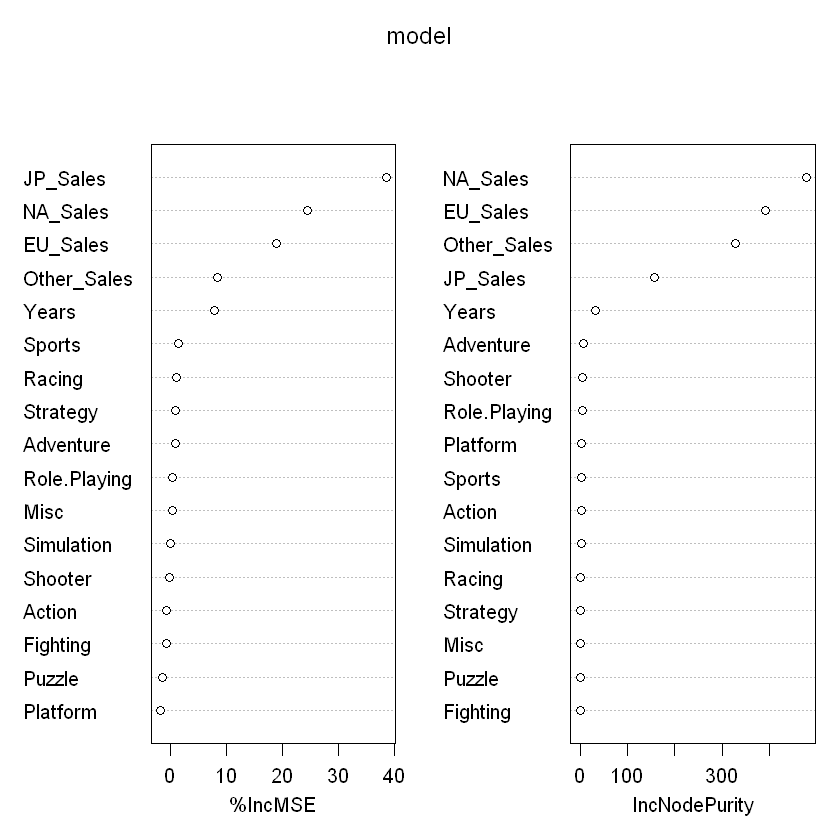

In [28]:
varImpPlot(model)